# **Task 2: Training from scratch: images**

In [1]:
# necessary imports
import os
import numpy
import pandas
import random
import trimesh
import logging
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import models, layers, regularizers, optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

# import Stratified K-Fold Cross Validation notebook
%run KFold-Cross-Validation.ipynb

# dataset root path
DATASET_ROOT = '/run/media/rr/M2/DevOps/jupyter-lab/CIDL/dataset/'

# final preprocessed dataset directory path
DATASET_PATH = os.path.join(DATASET_ROOT, 'Preprocessed')

# number of classes for the classification task
NUM_CLASSES = 5

In [2]:
# only log critical messages
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

## Experiment 0 - Simple Model

Found 1500 validated image filenames belonging to 5 classes.

-------- STARTING FOLD: 1 --------
Found 11250 validated image filenames belonging to 5 classes.
Found 2250 validated image filenames belonging to 5 classes.


2022-02-07 23:02:36.746027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 23:02:36.763957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 23:02:36.764075: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-07 23:02:36.764784: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "Experiment-0-1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)             

2022-02-07 23:02:38.327118: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


  1/352 [..............................] - ETA: 9:54 - loss: 1.5921 - accuracy: 0.0938

2022-02-07 23:02:38.994280: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


352/352 [==============================] - ETA: 0s - loss: 1.1602 - accuracy: 0.5538
Epoch 00001: val_loss improved from inf to 1.03251, saving model to saved_models/images/Experiment-0/Experiment-0-fold-1.h5
352/352 [==============================] - 42s 115ms/step - loss: 1.1602 - accuracy: 0.5538 - val_loss: 1.0325 - val_accuracy: 0.6111
Epoch 2/50
352/352 [==============================] - ETA: 0s - loss: 0.9402 - accuracy: 0.6510
Epoch 00002: val_loss improved from 1.03251 to 0.88337, saving model to saved_models/images/Experiment-0/Experiment-0-fold-1.h5
352/352 [==============================] - 39s 112ms/step - loss: 0.9402 - accuracy: 0.6510 - val_loss: 0.8834 - val_accuracy: 0.6698
Epoch 3/50
352/352 [==============================] - ETA: 0s - loss: 0.8446 - accuracy: 0.6835
Epoch 00003: val_loss improved from 0.88337 to 0.82400, saving model to saved_models/images/Experiment-0/Experiment-0-fold-1.h5
352/352 [==============================] - 39s 112ms/step - loss: 0.8446 - 

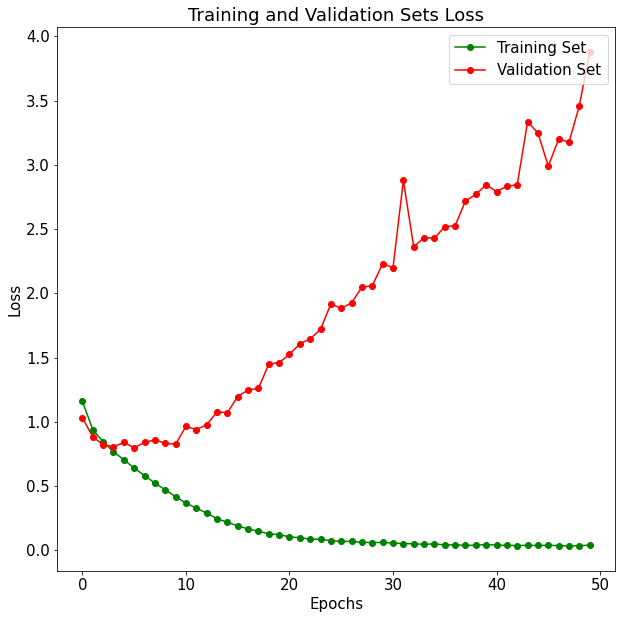

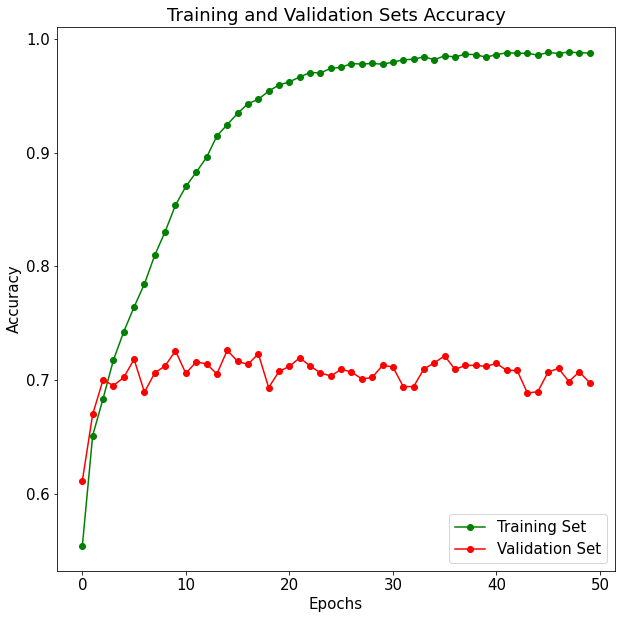

47/47 [==============================] - 5s 98ms/step - loss: 0.8319 - accuracy: 0.7200
Best model Test Loss: 0.8318620324134827
Best model Test Accuracy: 0.7200000286102295
Confusion Matrix
Normalized confusion matrix


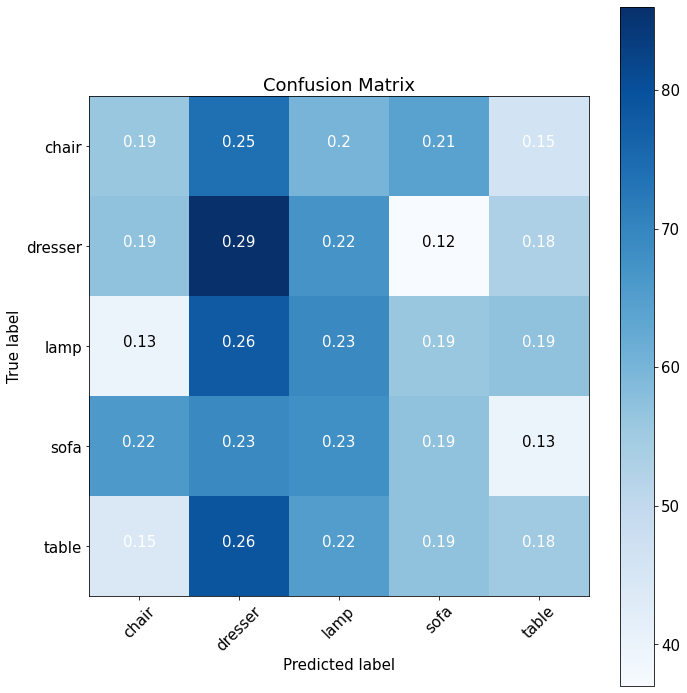

Classification Report
              precision    recall  f1-score   support

       chair       0.21      0.19      0.20       300
     dresser       0.22      0.29      0.25       300
        lamp       0.21      0.23      0.22       300
        sofa       0.21      0.19      0.20       300
       table       0.22      0.18      0.20       300

    accuracy                           0.22      1500
   macro avg       0.21      0.22      0.21      1500
weighted avg       0.21      0.22      0.21      1500


-------- TERMINATED FOLD: 1 --------


In [3]:
# experiment model layers
layers = [
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32),
    Activation('relu'),
    Dense(NUM_CLASSES, activation='softmax')
]

# train, validate and test
images_kfold_validation(model_name="Experiment-0", n_splits=6, test_size=0.10,
                        shuffle=True, layers=layers, learning_rate=0.001,
                        decay=1e-6, target_size=(32, 32), epochs=50,
                        batch_size=32, one_fold=True, resample_data=3000)

## Experiment 1 - Model

## Experiment 2 - Model

## Experiment 3 - Model

## Experiment 4 - Model